***Bono - 1er parcial***

***Señales y sistemas***

***Jessir Daniel Florez Hamburger***


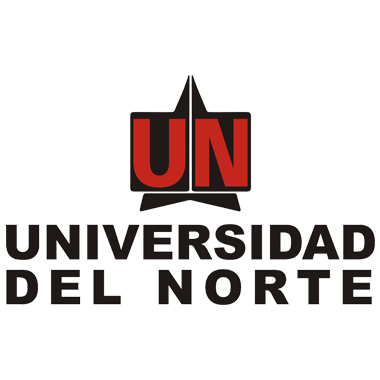

***Instalacion e importacion de librerias***

In [1]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=36589660e8c04a7705e0424e3bee37d7a6ffc59160fc6de11eff385957885f6f
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import read 
from scipy.signal import upfirdn
from playsound import playsound
import IPython.display as ipd
from scipy.io.wavfile import write
from scipy.signal import butter
from scipy.signal import filtfilt

***Importación de archivos de audio***

In [3]:
samplerate, data = read("Audio1.wav")
samplerate2, data2 = read('Audio2.wav')

In [4]:
ipd.Audio("Audio1.wav")

In [5]:
ipd.Audio("Audio2.wav")

***Gráfico de señales de audio***

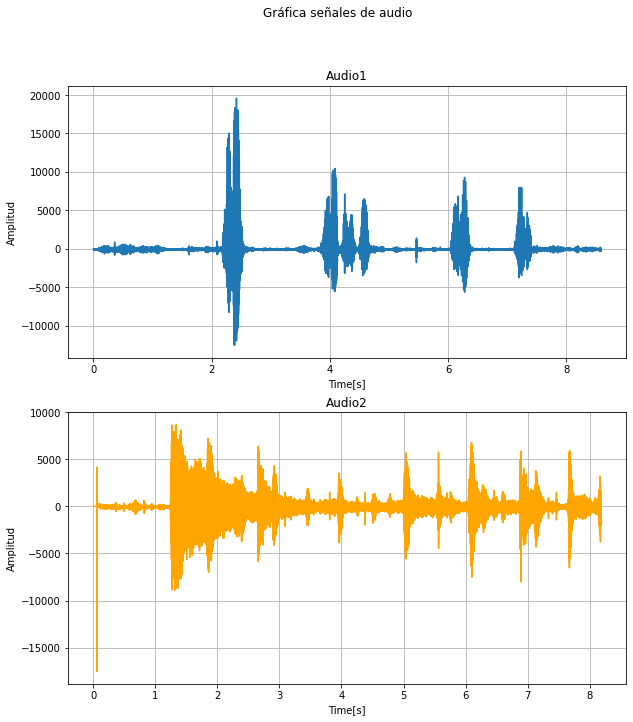

In [6]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

#GRAFICAR SEÑALES DE ENTRADA
fig, axs = plt.subplots(2)
fig.suptitle('Gráfica señales de audio')

axs[0].set_title("Audio1")
axs[0].set_xlabel("Time[s]")
axs[0].set_ylabel("Amplitud")
axs[0].plot(time, data)
axs[0].grid(True)


axs[1].set_title("Audio2")
axs[1].set_xlabel("Time[s]")
axs[1].set_ylabel("Amplitud")
axs[1].plot(time2,data2,color="orange")
axs[1].grid(True)

fig.set_size_inches(10, 11)

***A continuacuón se le aplica el proceso de upsampling a la señal número 1***

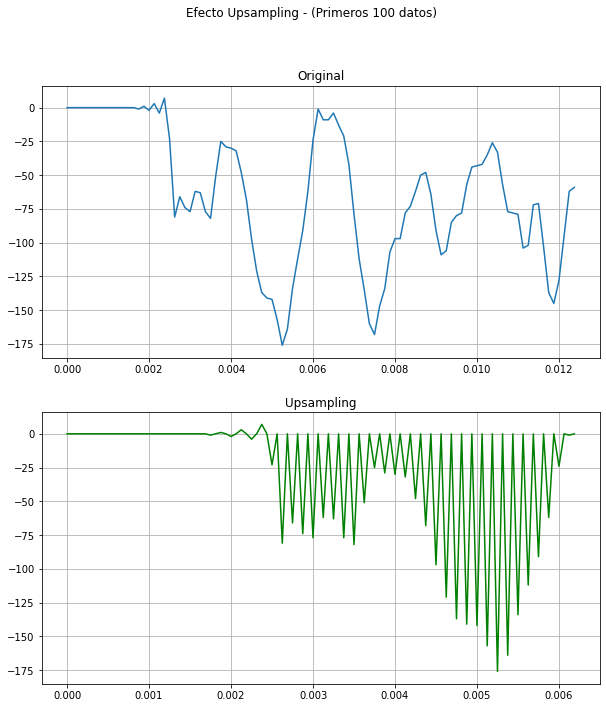

In [7]:
factor=2
new_data=upfirdn([1],data,factor) 
new_sample_r=samplerate*factor

new_duration = len(new_data)/new_sample_r
new_time = np.arange(0,new_duration,1/new_sample_r) #time vector

#GRAFICAR SEÑALES DE ENTRADA
fig, axs = plt.subplots(2)
fig.suptitle('Efecto Upsampling - (Primeros 100 datos)')

axs[0].set_title("Original")
axs[0].plot(time[:100], data[:100])
axs[0].grid(True)

axs[1].set_title("Upsampling")
axs[1].plot(new_time[:100],new_data[:100],color="green")
axs[1].grid(True)

fig.set_size_inches(10, 11)

***Conversión señal con Upsampling a .wav***

In [8]:
write("upsam.wav", new_sample_r, new_data.astype(np.int16))

In [9]:
ipd.Audio("upsam.wav")

***Suma de las dos señales***

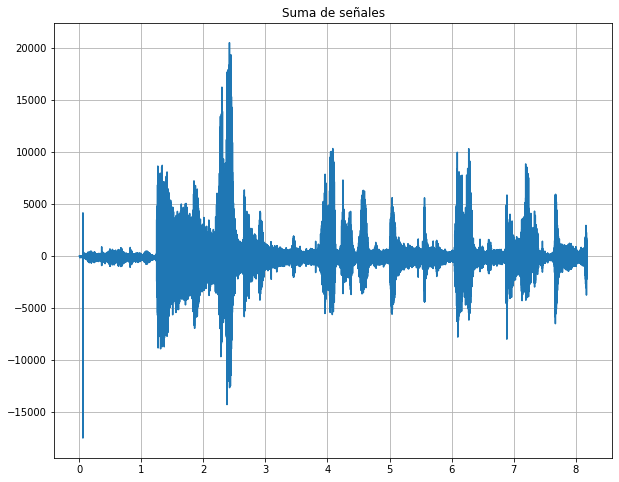

In [10]:
sum_signal=new_data[:130880]+data2

#GRAFICAR SEÑAL SUMADA
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.plot(new_time[:130880],sum_signal)
plt.title("Suma de señales")
plt.grid(True)

***Conversión señal sumada a audio***

In [11]:
write("suma.wav", new_sample_r, sum_signal.astype(np.int16))

In [12]:
ipd.Audio("suma.wav")

***Filtro de señal***

In [13]:
samfil, datafil = butter(1,3000, btype='highpass',fs =new_sample_r)
signal_fil = filtfilt(samfil,datafil,sum_signal)
write("signal_fil.wav", new_sample_r, signal_fil.astype(np.int16))
ipd.Audio("signal_fil.wav")